将原来的wine.data数据转换为data.csv

In [7]:
import csv

# 打开数据文件
file = open('wine.data', 'r')
csvfile = open('data.csv', 'w', newline='')

# 创建CSV写入器
writer = csv.writer(csvfile)

# 写入表头
writer.writerow(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                 'OD280/OD315 of diluted wines', 'Proline'])

# 逐行读取数据文件
for line in file:
    # 去除行末尾的换行符，并按逗号分隔数据
    data = line.strip().split(',')

    # 将数据写入CSV文件
    writer.writerow(data)

# 关闭文件
file.close()
csvfile.close()

读取data.csv文件的基本信息

In [8]:
import pandas as pd

train_df = pd.read_csv("./data.csv")

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
None


In [9]:
# 删除"class"列
train_df_without_class = train_df.drop("class", axis=1)

# 打印描述统计
print(train_df_without_class.describe())

          Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

画   Alcohol   Malic acid   和   Ash   的条形图

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 1, figsize=(10, 6))
plt.subplots_adjust(top=2)

ax[0].hist(train_df['Alcohol'], color='b', bins=50, edgecolor='black')
ax[0].set_title('Alcohol')

ax[1].hist(train_df['Malic acid'], color='b', bins=50, edgecolor='black')
ax[1].set_title('Malic acid')

ax[2].hist(train_df['Ash'], color='b', bins=50, edgecolor='black')
ax[2].set_title('Ash')

plt.show()

<Figure size 1000x600 with 3 Axes>

画   Alcalinity of ash   Magnesium   和   Total phenols   的条形图

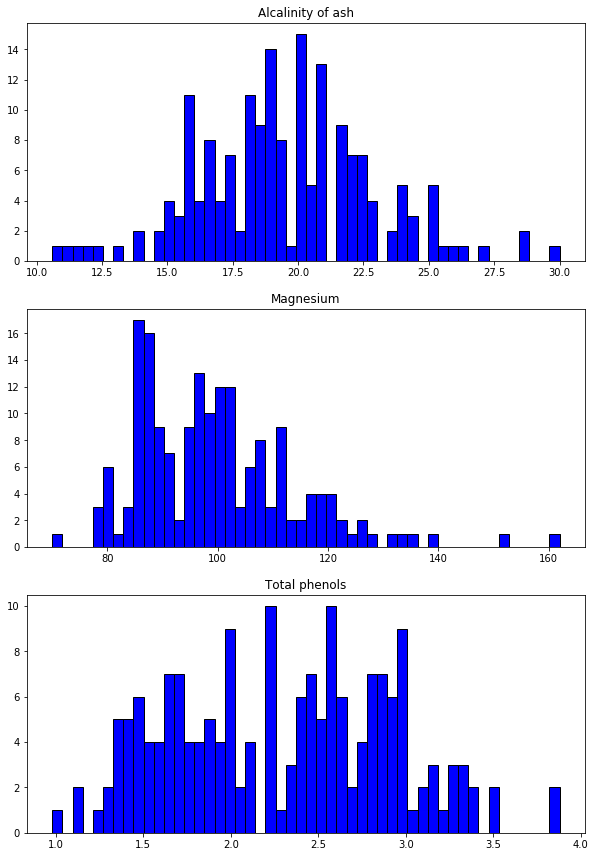

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
plt.subplots_adjust(top=2)

ax[0].hist(train_df['Alcalinity of ash'], color='b', bins=50, edgecolor='black')
ax[0].set_title('Alcalinity of ash')

ax[1].hist(train_df['Magnesium'], color='b', bins=50, edgecolor='black')
ax[1].set_title('Magnesium')

ax[2].hist(train_df['Total phenols'], color='b', bins=50, edgecolor='black')
ax[2].set_title('Total phenols')

plt.show()

画   Flavanoids   Nonflavanoid phenols   和   Proanthocyanins   的条形图

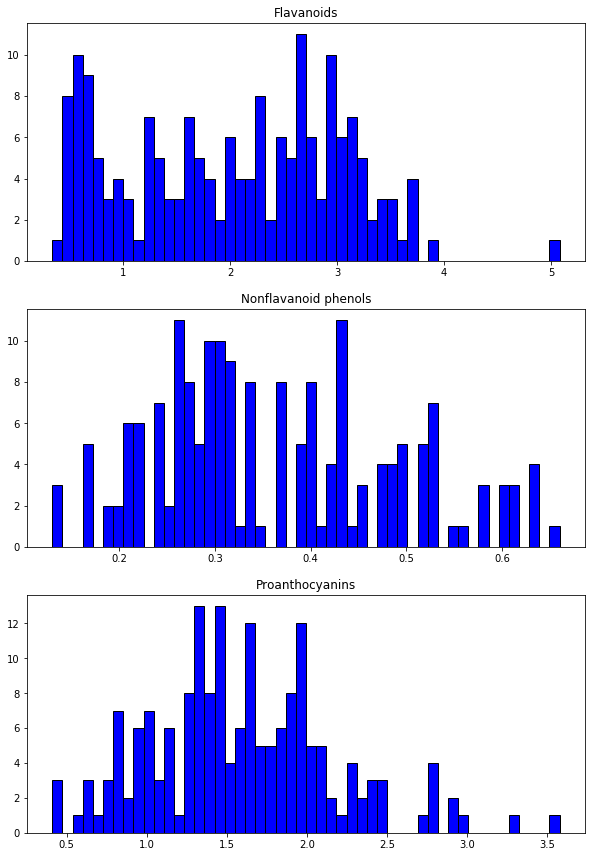

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
plt.subplots_adjust(top=2)

ax[0].hist(train_df['Flavanoids'], color='b', bins=50, edgecolor='black')
ax[0].set_title('Flavanoids')

ax[1].hist(train_df['Nonflavanoid phenols'], color='b', bins=50, edgecolor='black')
ax[1].set_title('Nonflavanoid phenols')

ax[2].hist(train_df['Proanthocyanins'], color='b', bins=50, edgecolor='black')
ax[2].set_title('Proanthocyanins')

plt.show()

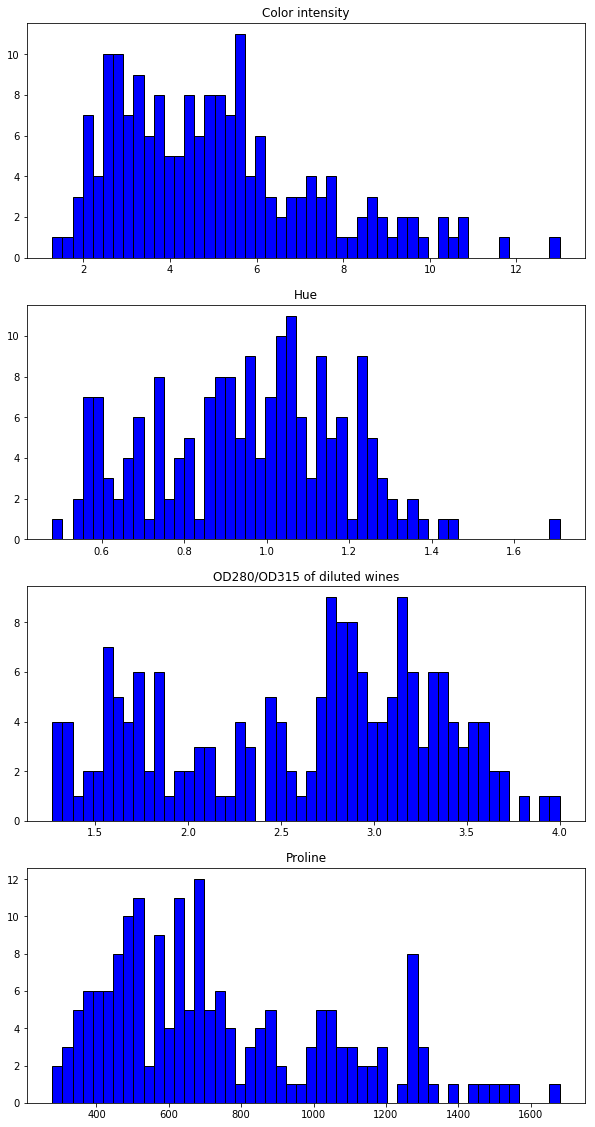

In [13]:
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
plt.subplots_adjust(top=2)

ax[0].hist(train_df['Color intensity'], color='b', bins=50, edgecolor='black')
ax[0].set_title('Color intensity')

ax[1].hist(train_df['Hue'], color='b', bins=50, edgecolor='black')
ax[1].set_title('Hue')

ax[2].hist(train_df['OD280/OD315 of diluted wines'], color='b', bins=50, edgecolor='black')
ax[2].set_title('OD280/OD315 of diluted wines')

ax[3].hist(train_df['Proline'], color='b', bins=50, edgecolor='black')
ax[3].set_title('Proline')

plt.show()

处理数据中的缺失值

In [14]:
# 查看数据的缺失率
print(train_df.isnull().sum().sort_values(ascending = False) / train_df.shape[0])

Proline                         0.0
OD280/OD315 of diluted wines    0.0
Hue                             0.0
Color intensity                 0.0
Proanthocyanins                 0.0
Nonflavanoid phenols            0.0
Flavanoids                      0.0
Total phenols                   0.0
Magnesium                       0.0
Alcalinity of ash               0.0
Ash                             0.0
Malic acid                      0.0
Alcohol                         0.0
class                           0.0
dtype: float64


In [15]:
# 查看数据的形式
train_df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


进行数据的归一化处理

In [16]:
# 数据归一化
from sklearn.preprocessing import StandardScaler

cols = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
         'OD280/OD315 of diluted wines', 'Proline']  
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df[cols[1:]])  
scaled_df = pd.DataFrame(scaled_data, columns=cols[1:]) 
scaled_df.insert(0, 'class', train_df['class'])  

scaled_df.to_csv('data_use.csv', index=False)

In [17]:
scaled_df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


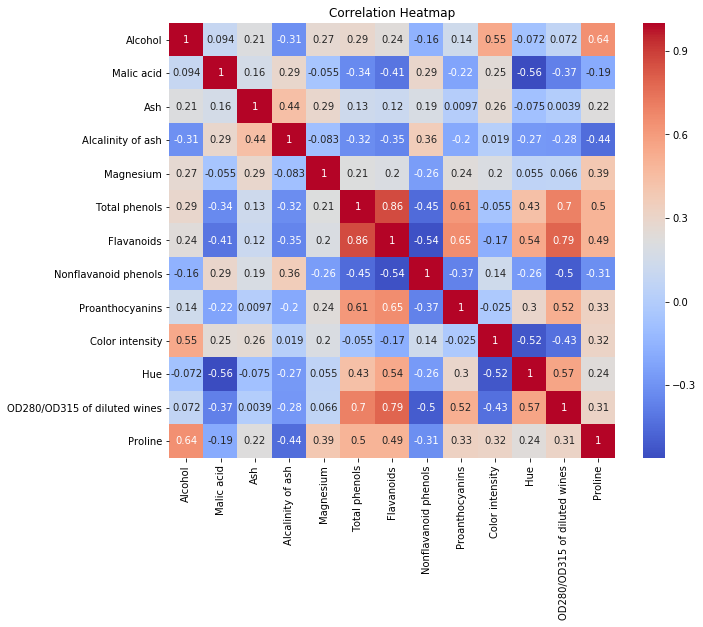

In [18]:
import seaborn as sns
correlation_matrix = scaled_df[cols[1:]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

PCA降维

In [19]:
from sklearn.decomposition import PCA

# 获取除了class之外的所有数据列
data_2 = scaled_df[cols[1:]].values

# 创建PCA对象并拟合数据
pca = PCA(n_components=2)
pca.fit(data_2)

# 转换数据到低维空间
transformed_data_2 = pca.transform(data_2)

# 将降维后的数据转换为DataFrame
df_transformed_2 = pd.DataFrame(transformed_data_2, columns=['PC1', 'PC2'])

# 将'class'列与降维后的数据合并
df_combined_2 = pd.concat([scaled_df['class'], df_transformed_2], axis=1)

# 将合并后的数据保存到CSV文件
df_combined_2.to_csv('PCA_2.csv', index=False)

In [ ]:
# 获取除了class之外的所有数据列
data_3 = scaled_df[cols[1:]].values

# 创建PCA对象并拟合数据
pca = PCA(n_components=3)
pca.fit(data_3)

# 转换数据到低维空间
transformed_data_3 = pca.transform(data_3)

# 将降维后的数据转换为DataFrame
df_transformed_3 = pd.DataFrame(transformed_data_3, columns=['PC1', 'PC2', 'PC3'])

# 将'class'列与降维后的数据合并
df_combined_3 = pd.concat([scaled_df['class'], df_transformed_3], axis=1)

# 将合并后的数据保存到CSV文件
df_combined_3.to_csv('PCA_3.csv', index=False)

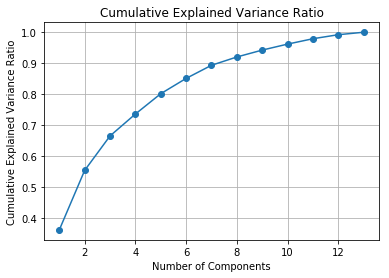

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 获取除了class之外的所有数据列
data = scaled_df[cols[1:]].values

# 创建PCA对象并拟合数据
pca = PCA()
pca.fit(data)

# 计算累计可解释方差比例
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 绘制累计可解释方差比例曲线
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()